In [1]:
try:
    import torch
    print("successfully imported torch")
    print(torch.__version__)
except ImportError:
    !! pip install torch torchvision torchaudio --user --index-url https://download.pytorch.org/whl/cpu
    print("completed installing torch")

successfully imported torch
2.6.0+cu124


In [2]:
try:
    import numpy as np
    print("successfully imported numpy")
    print(np.__version__)
except ImportError:
    !! pip install numpy --user --upgrade
    print("completed installing numpy")

successfully imported numpy
1.26.4


In [3]:
try:
    from matplotlib import pyplot as plt
    print("successfully imported matplotlib")
except ImportError:
    !! pip install matplotlib --user --upgrade
    print("completed installing matplotlib")

successfully imported matplotlib


In [4]:
!! pip install aenet-gpr --user --upgrade
print("completed installing aenet-gpr")

! pip show aenet-gpr

completed installing aenet-gpr
Name: aenet-gpr
Version: 2.1.10
Summary: Atomistic simulation tools based on Gaussian Processes Regression
Home-page: https://github.com/atomisticnet/aenet-gpr
Author: In Won Yeu
Author-email: iy2185@columbia.edu
License: MPL-2.0
Location: /data/home/iy2185/.local/lib/python3.12/site-packages
Requires: ase, dscribe
Required-by: 


In [5]:
import os, sys, site
sys.path.append(site.USER_SITE)

import aenet_gpr
print(aenet_gpr.__version__)

2.1.10


In [6]:
from IPython.display import Image

try:
    import ase.io
    print("successfully imported ase")
except ImportError:
    !! pip install ase --user --upgrade
    print("completed installing ASE")
    
    import ase.io
    print("successfully imported ase")

successfully imported ase


# 1. Prepare training/test data

We are using train/test HSE06 data of EC dimer prepared in `aenet-gpr/example/2_EC-EC/`

In [7]:
import os.path

! rm -rf 2_EC-EC
! mkdir 2_EC-EC
    
if os.path.isfile("../example/2_EC-EC/train_set_tutorial.zip"):
    ! unzip -oq ../example/2_EC-EC/train_set_tutorial.zip -d ./2_EC-EC/
    print("number of train data:")
    ! find ./2_EC-EC/train_set_tutorial/ -type f | wc -l
else:
    ! wget https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip
    ! unzip -oq train_set_tutorial.zip -d ./2_EC-EC/
    ! rm train_set_tutorial.zip
    print("number of train data:")
    ! find ./2_EC-EC/train_set_tutorial/ -type f | wc -l

--2025-09-26 14:42:44--  https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip [following]
--2025-09-26 14:42:44--  https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101063 (99K) [application/zip]
Saving to: ‘train_set_tutorial.zip’

train_set_tutorial. 100%[===================>]  98.69K  --.-KB/s    in 0.003s  

2025

In [8]:
if os.path.isfile("../example/2_EC-EC/test_set_tutorial.zip"):
    ! unzip -oq ../example/2_EC-EC/test_set_tutorial.zip -d ./2_EC-EC/
    print("number of test data:")
    ! find ./2_EC-EC/test_set_tutorial/ -type f | wc -l
else:
    ! wget https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip
    ! unzip -oq test_set_tutorial.zip -d ./2_EC-EC/
    ! rm test_set_tutorial.zip
    print("number of test data:")
    ! find ./2_EC-EC/test_set_tutorial/ -type f | wc -l

--2025-09-26 14:42:47--  https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip [following]
--2025-09-26 14:42:48--  https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 257174 (251K) [application/zip]
Saving to: ‘test_set_tutorial.zip’

test_set_tutorial.z 100%[===================>] 251.15K  --.-KB/s    in 0.005s  

2025-09

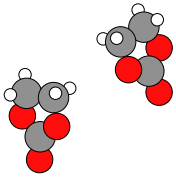

In [9]:
atoms = ase.io.read("./2_EC-EC/test_set_tutorial/file_0000.xsf")
ase.io.write('2EC.png', atoms)
Image("2EC.png")

# 2-1. Train–Test with default Cartesian fingerprint

In [10]:
! rm -f train.in

if os.path.isfile("../example/2_EC-EC/train.in"):
    ! cp ../example/2_EC-EC/train.in .
else:
    ! wget https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/train.in

--2025-09-26 14:43:40--  https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/train.in
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/train.in [following]
--2025-09-26 14:43:40--  https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/train.in
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 566 [text/plain]
Saving to: ‘train.in’

train.in            100%[===================>]     566  --.-KB/s    in 0s      

2025-09-26 14:43:40 (10.4 MB/s) - ‘train.in’ saved [566/566]



In [11]:
! cat train.in

# File path
Train_file ./2_EC-EC/train_set_tutorial/file_*.xsf
Test_file ./2_EC-EC/test_set_tutorial/file_*.xsf

# Train model save (default: False)
# Train_model_save True

# File format (default: xsf)
File_format xsf

# Descriptor (default: cartesian coordinates)
Descriptor cart

# Kernel parameter
# scale 1.5
# weight 1.0

# Data process (default: batch, 25)
data_process batch
batch_size 25

# Flags for xsf file writing (default: False)
Train_write False
Test_write False
# Additional_write True

# Data augmentation parameter
# Disp_length 0.05
# Num_copy 3


In [12]:
! python -m aenet_gpr train.in

aenet-GPR: surrogate GPR for GPR-ANN indirect force training

2025-09-26 14:44:41.

Developed by In Won Yeu

This program performs three main steps:
1. Train: Generates a GPR model using the provided structure, energy, and force data.
2. Test: Uses the generated GPR model to predict values for the test set structures.
3. Augmentation: Performs data augmentation in xsf file format, compatible with aenet-(PyTorch),
supporting a GPR-ANN training in conjunction with aenet-(PyTorch).

Each of these steps is executed once the input file (train.in) contains the keywords:
Train_file [train file path]
Test_file [test file path]
Additional_write [True]


Train

Read reference training data

Time needed for reading data:            0.073937 s
Maximum CPU memory used:             0.606815 GB
Maximum GPU memory used:             0.000000 GB
Energy data size: (80,)  # (N_data, )
Force data size: (80, 20, 3)  # (N_data, N_atom, 3)
----------------------------------------------------------------------

# 2-2. Visualize the results

In [13]:
energy_test_gpr = np.load("./energy_test_gpr.npy")
energy_test_reference = np.load("./energy_test_reference.npy")
force_test_gpr = np.load("./force_test_gpr.npy")
force_test_reference = np.load("./force_test_reference.npy")
uncertainty_test_gpr = np.load("./uncertainty_test_gpr.npy")

In [14]:
diff_per_atom = (energy_test_reference - energy_test_gpr) / 20

print(diff_per_atom.min(), diff_per_atom.max())

-0.0037080216154208754 0.007426366634354054


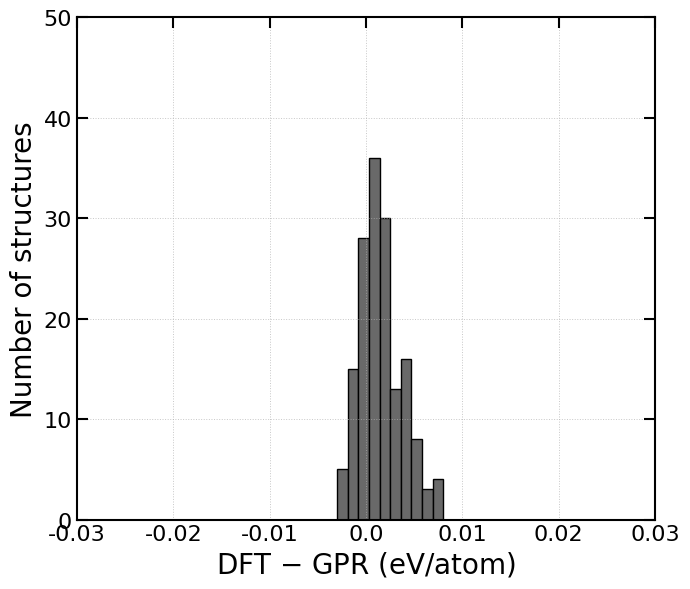

In [15]:
fig = plt.figure(figsize=(7, 6))
ax2 = fig.subplots()

font_x = {'size': 20, 'color': 'black'}
font_y = {'size': 20, 'color': 'black'}
font_tick = {'size': 16, 'color': 'black'}


# The second plot
counts, bins = np.histogram(diff_per_atom, bins=30, range=(-0.003, 0.03))

ax2.hist(bins[:-1], bins, weights=counts, facecolor='dimgray', alpha=1.0, edgecolor='black')

ax2.set_xlabel("DFT $-$ GPR (eV/atom)", fontdict=font_x)
ax2.set_xlim([-0.03, 0.03])
x_labels = [round(label, 2) for label in ax2.get_xticks()]
ax2.set_xticks(x_labels)
ax2.set_xlim([-0.03, 0.03])
ax2.set_xticklabels(x_labels, fontdict=font_tick)

ax2.set_ylabel("Number of structures", fontdict=font_y)
ax2.set_ylim([0, 50])
y_labels = [int(label) for label in ax2.get_yticks()]
ax2.set_yticks(y_labels)
ax2.set_ylim([0, 50])
ax2.set_yticklabels(y_labels, fontdict=font_tick)

[x.set_linewidth(1.5) for x in ax2.spines.values()]
ax2.tick_params(bottom=False, top=True, left=True, right=True)
ax2.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax2.tick_params(direction='in', length=8, width=1.5)

ax2.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)

fig.tight_layout()
plt.show()

# 3. Augment

So, using these parameters, augment step will be executed.

In [16]:
! sed -i '3s|.*|# Test_file ./2_EC-EC/test_set_tutorial/file_*.xsf|' train.in
! sed -i '25s|.*|Additional_write True|' train.in
! sed -i '28s|.*|Disp_length 0.05|' train.in
! sed -i '29s|.*|Num_copy 2|' train.in

In [17]:
! cat train.in

# File path
Train_file ./2_EC-EC/train_set_tutorial/file_*.xsf
# Test_file ./2_EC-EC/test_set_tutorial/file_*.xsf

# Train model save (default: False)
# Train_model_save True

# File format (default: xsf)
File_format xsf

# Descriptor (default: cartesian coordinates)
Descriptor cart

# Kernel parameter
# scale 1.5
# weight 1.0

# Data process (default: batch, 25)
data_process batch
batch_size 25

# Flags for xsf file writing (default: False)
Train_write False
Test_write False
Additional_write True

# Data augmentation parameter
Disp_length 0.05
Num_copy 2


In [18]:
! rm -rf additional_xsf/
! python -m aenet_gpr train.in

aenet-GPR: surrogate GPR for GPR-ANN indirect force training

2025-09-26 14:46:26.

Developed by In Won Yeu

This program performs three main steps:
1. Train: Generates a GPR model using the provided structure, energy, and force data.
2. Test: Uses the generated GPR model to predict values for the test set structures.
3. Augmentation: Performs data augmentation in xsf file format, compatible with aenet-(PyTorch),
supporting a GPR-ANN training in conjunction with aenet-(PyTorch).

Each of these steps is executed once the input file (train.in) contains the keywords:
Train_file [train file path]
Test_file [test file path]
Additional_write [True]


Train

Read reference training data

Time needed for reading data:            0.078423 s
Maximum CPU memory used:             0.607975 GB
Maximum GPU memory used:             0.000000 GB
Energy data size: (80,)  # (N_data, )
Force data size: (80, 20, 3)  # (N_data, N_atom, 3)
----------------------------------------------------------------------

Now, 160 new data have been augmented

In [19]:
! cd ./additional_xsf/ && ls

file_00000.xsf	file_00032.xsf	file_00064.xsf	file_00096.xsf	file_00128.xsf
file_00001.xsf	file_00033.xsf	file_00065.xsf	file_00097.xsf	file_00129.xsf
file_00002.xsf	file_00034.xsf	file_00066.xsf	file_00098.xsf	file_00130.xsf
file_00003.xsf	file_00035.xsf	file_00067.xsf	file_00099.xsf	file_00131.xsf
file_00004.xsf	file_00036.xsf	file_00068.xsf	file_00100.xsf	file_00132.xsf
file_00005.xsf	file_00037.xsf	file_00069.xsf	file_00101.xsf	file_00133.xsf
file_00006.xsf	file_00038.xsf	file_00070.xsf	file_00102.xsf	file_00134.xsf
file_00007.xsf	file_00039.xsf	file_00071.xsf	file_00103.xsf	file_00135.xsf
file_00008.xsf	file_00040.xsf	file_00072.xsf	file_00104.xsf	file_00136.xsf
file_00009.xsf	file_00041.xsf	file_00073.xsf	file_00105.xsf	file_00137.xsf
file_00010.xsf	file_00042.xsf	file_00074.xsf	file_00106.xsf	file_00138.xsf
file_00011.xsf	file_00043.xsf	file_00075.xsf	file_00107.xsf	file_00139.xsf
file_00012.xsf	file_00044.xsf	file_00076.xsf	file_00108.xsf	file_00140.xsf
file_00013.xsf	file_00045

Their structures are perturbed from reference training data and their energy tags are given from the GPR predictions

In [20]:
! cd ./additional_xsf/ && cat file_00015.xsf

# total energy = -18640.2208655713839107 eV

ATOMS
O     9.82721364443320     6.45026079599335     12.23346226710454     1.39935391165511     1.41786325648541     -1.10716013611660
O     8.41276814259878     5.21907047900292     13.53305923374141     2.61632025606340     2.21242113131746     -2.74515393051161
O     9.98889671349001     4.17619943036426     12.15207146022709     -0.84378892782107     2.93937163932594     -0.01957322732478
C     9.28107005814269     7.54361869869649     13.04181231567906     -2.71305468905667     -4.78690026408253     0.53832580471219
C     8.00325624628473     6.67298647735712     13.57151477400178     2.98515387907591     -0.83658726999143     2.02154502508487
C     9.52933648378234     5.28528909104485     12.48126688825571     -2.54102045852399     -4.03835221851375     3.01386223165565
H     8.97645336458058     8.27335970902639     12.46458340409298     -0.34237657736643     1.55881780920482     -1.58798397587665
H     9.82194755964725     7.843852

In [21]:
! cd ./additional_xsf/ && cat file_00016.xsf

# total energy = -18640.2260553655542026 eV

ATOMS
O     10.00850199464345     6.50932532453587     12.31245938967771     -1.19778447366568     -2.53331320451559     0.39512874213708
O     8.41582861348162     5.30380591314717     13.52926208754580     1.03005078032906     0.33130629266762     -1.53072281283363
O     9.91873733342309     4.09743027682104     12.18815690776962     -1.66096174841613     4.01661239159787     1.19454781539090
C     9.29433576392171     7.52368395724192     13.04790393008544     -1.48830909505787     -3.57714680921804     -1.17442303955858
C     8.05475568660386     6.68309458264375     13.58376584506382     0.70235372423461     0.73714799925822     0.12751048187448
C     9.43305502055791     5.18782724977434     12.61848711203587     2.12190856047256     -1.80150495695052     -1.10327775971291
H     8.96340850968417     8.19703495034280     12.36144498417672     -0.67359355387938     1.59589615027286     -1.16589899341294
H     9.93739100342455     7.81558